In [1]:
# Copyright 2021, Abhirup Ghosh <abhirup.ghosh.184098@gmail.com>

In [2]:
import numpy as np
import corner
import matplotlib.pyplot as plt

## Corner plot: fractional quantities

<Figure size 576x576 with 0 Axes>

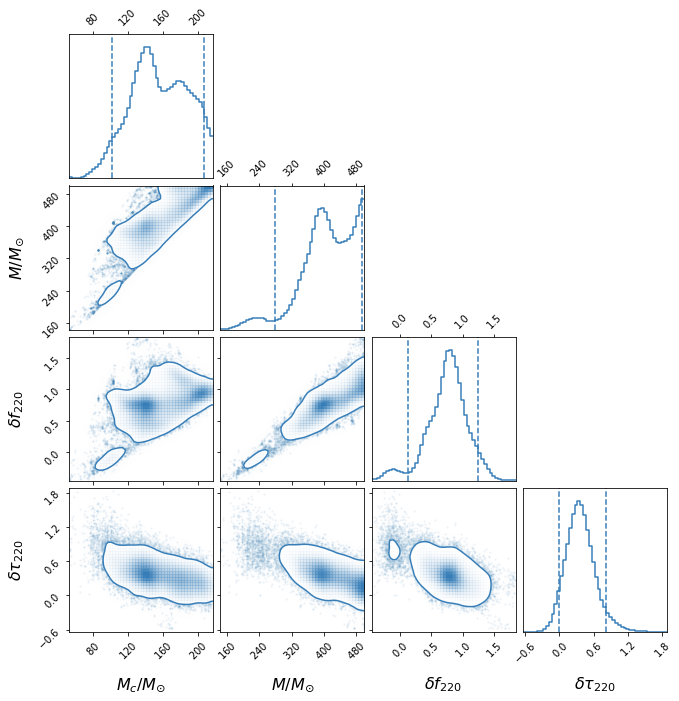

In [5]:
data = np.genfromtxt('../../runs/O3a/GW190521a/220_rererun_newpsd/cbcBayes/posterior_samples.dat', dtype=None, names=True)
samples = np.vstack([data['mc'], data['mtotal'], data['domega220'], data['dtau220']])

font = {'family': 'Times New Roman',
        'color':  'k',
        'weight': 'ultralight',
        'size': 16,
        }

plt.figure(figsize=(8,8))
corner.corner(samples.T, bins=50, color='#377eb8', smooth=1.5, smooth1d=1.5, range=None, weights=None, hist_bin_factor=1, 
              labels=['$M_c/M_{\odot}$', '$M/M_{\odot}$', '$\delta f _{220}$','$\delta \\tau _{220}$'], 
              label_kwargs=font, titles=None, show_titles=False, title_fmt=None, title_kwargs=None, truths=None, 
              truth_color='#4682b4', scale_hist=False, quantiles=[0.05,0.95], levels=[0.9], verbose=False, fig=None, max_n_ticks=5, 
              top_ticks=True, use_math_text=True, reverse=False, labelpad=0.0, hist_kwargs=None, 
              plot_datapoints=True, plot_density=True, plot_contours=True, no_fill_contours=False, fill_contours=False )

plt.savefig("./figures/mtotal_qnm_frac_params_degeneracy_S190521g.pdf", dpi=300)
plt.savefig("./figures/mtotal_qnm_frac_params_degeneracy_S190521g.png", dpi=300)
plt.show()

## Corner plot: Absolute quantities

<Figure size 576x576 with 0 Axes>

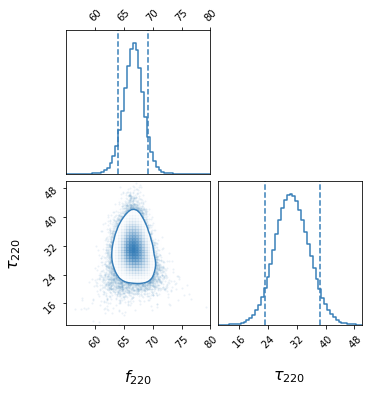

In [12]:
f220, tau220 = np.genfromtxt('../../runs/O3a/GW190521a/220_rererun_newpsd/cbcBayes/qnmtest/qnmtest_abs_params_f_tau_modGR_data.dat', unpack=True)

samples_qnm = np.vstack([f220, tau220*1000])

font = {'family': 'Times New Roman',
        'color':  'k',
        'weight': 'ultralight',
        'size': 16,
        }

plt.figure(figsize=(8,8))
corner.corner(samples_qnm.T, bins=50, color='#377eb8', smooth=1.5, smooth1d=1.5, range=[[55,80],[10,50]], weights=None, hist_bin_factor=1, 
              labels=['$f _{220}$','$\\tau _{220}$'], 
              label_kwargs=font, titles=None, show_titles=False, title_fmt=None, title_kwargs=None, truths=None, 
              truth_color='#4682b4', scale_hist=False, quantiles=[0.05,0.95], levels=[0.9], verbose=False, fig=None, max_n_ticks=5, 
              top_ticks=True, use_math_text=True, reverse=False, labelpad=0.0, hist_kwargs=None, 
              plot_datapoints=True, plot_density=True, plot_contours=True, no_fill_contours=False, fill_contours=False )

plt.savefig("./figures/qnm_abs_params_degeneracy_S190521g.pdf", dpi=300)
plt.savefig("./figures/qnm_abs_params_degeneracy_S190521g.png", dpi=300)
plt.show()